Veri Seti Seçimi ve Yükleme

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

# CIFAR-10 veri setini yükleyelim
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Veri seti boyutlarını yazdıralım
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


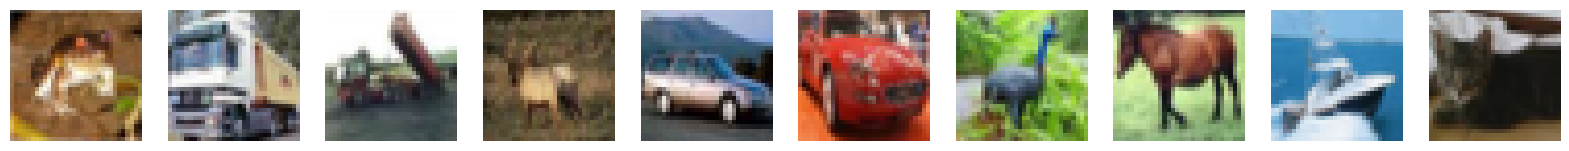

In [54]:
# İlk 10 görüntüyü görselleştirelim
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(X_train[i])
    axes[i].axis('off')
plt.show()


In [6]:
# Verileri normalize edelim (0-1 aralığına sokalım)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [7]:
# Kategorik hale getirelim (one-hot encoding)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

CNN Kullanalım


In [57]:
# Evrişimli Sinir Ağı modelini oluşturalım
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Modeli derleyelim
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model özetini yazdıralım
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
#modeli eğitelim bakalım
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.2938 - loss: 1.8877 - val_accuracy: 0.5302 - val_loss: 1.2917
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5080 - loss: 1.3576 - val_accuracy: 0.6134 - val_loss: 1.0998
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5911 - loss: 1.1675 - val_accuracy: 0.6420 - val_loss: 1.0122
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6397 - loss: 1.0320 - val_accuracy: 0.6678 - val_loss: 0.9262
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6718 - loss: 0.9292 - val_accuracy: 0.6914 - val_loss: 0.8595
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6988 - loss: 0.8650 - val_accuracy: 0.7086 - val_loss: 0.8390
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7205 - loss: 0.8040 - val_accuracy: 0.7024 - val_loss: 0.8372
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7360 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.7144


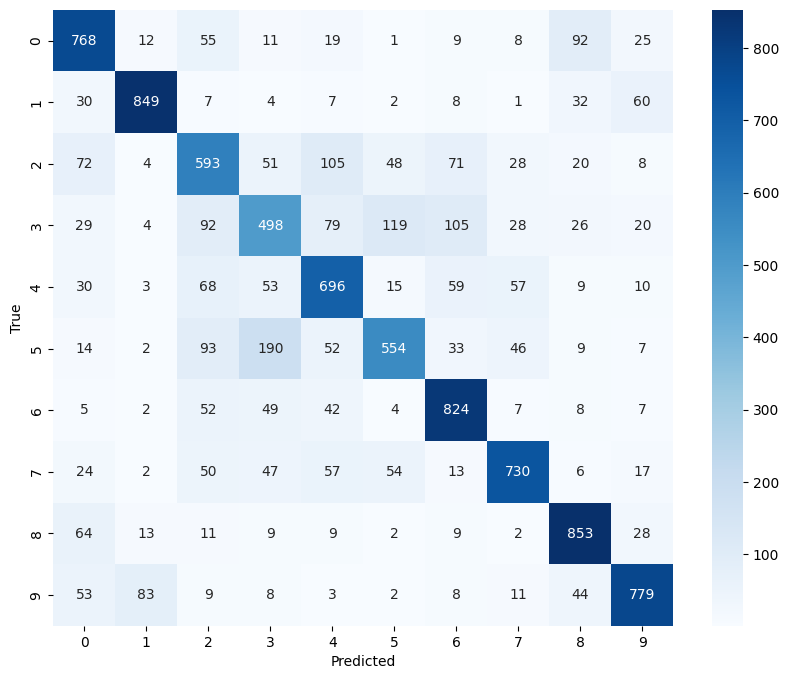

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1000
           1       0.87      0.85      0.86      1000
           2       0.58      0.59      0.58      1000
           3       0.54      0.50      0.52      1000
           4       0.65      0.70      0.67      1000
           5       0.69      0.55      0.62      1000
           6       0.72      0.82      0.77      1000
           7       0.80      0.73      0.76      1000
           8       0.78      0.85      0.81      1000
           9       0.81      0.78      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [59]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Test verileri üzerinde doğruluk değerini hesaplayalım (accuracy)

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=-1)
y_test_labels = np.argmax(y_test, axis=-1)
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix oluşturalım
cm = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Sınıflandırma Raporu oluşturalım
print(classification_report(y_test_labels, y_pred))


CNN modeli başarılı bir model olarak kullanılabilir. accuracy değeri ideal seviyede çıktı 

KNN kullanalım


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar10
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# CIFAR-10 veri setini yükleyelim zaten var ama yinede yüklemek iyi olur
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Veri seti boyutlarını yazdıralım
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


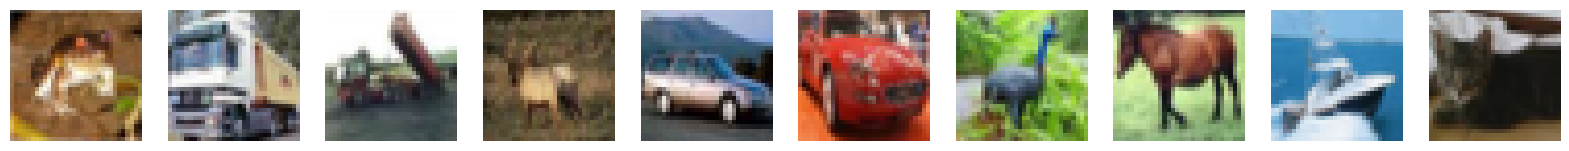

In [10]:
# İlk 10 görüntüyü görselleştirelim ki her adımda doğru ilerlediğimi görelim
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(X_train[i])
    axes[i].axis('off')
plt.show()


In [11]:
# Verileri normalize eedelim
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [12]:
# Verileri düzleştirelim
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


In [13]:
# KNN modelini oluşturalım
knn = KNeighborsClassifier(n_neighbors=5)

# Modeli eğitelim
knn.fit(X_train_flat, y_train.ravel())


KNeighborsClassifier()

[2 8 8 ... 5 6 4]
Accuracy: 0.3398


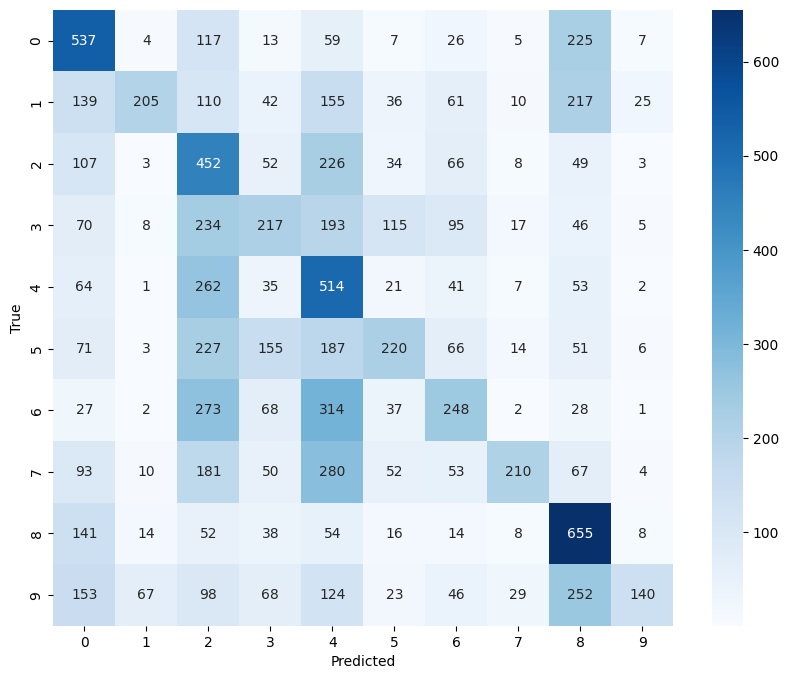

              precision    recall  f1-score   support

           0       0.38      0.54      0.45      1000
           1       0.65      0.20      0.31      1000
           2       0.23      0.45      0.30      1000
           3       0.29      0.22      0.25      1000
           4       0.24      0.51      0.33      1000
           5       0.39      0.22      0.28      1000
           6       0.35      0.25      0.29      1000
           7       0.68      0.21      0.32      1000
           8       0.40      0.66      0.50      1000
           9       0.70      0.14      0.23      1000

    accuracy                           0.34     10000
   macro avg       0.43      0.34      0.33     10000
weighted avg       0.43      0.34      0.33     10000



In [14]:
# Tahmin yaptıralım
y_pred = knn.predict(X_test_flat)
print(y_pred)
# Doğruluk skorunu hesaplayalım
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix oluşturalım
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Sınıflandırma Raporu oluşturalım
print(classification_report(y_test, y_pred))


Burda KNN çok düşük bir başarı gösterdi. model değerleri güncellenerek başarı yükseltilebilir.

SVM Modelini kullanalım


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar10
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# CIFAR-10 veri setini yükleyelim tekrardan 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Veri seti boyutlarını yazdıralım
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


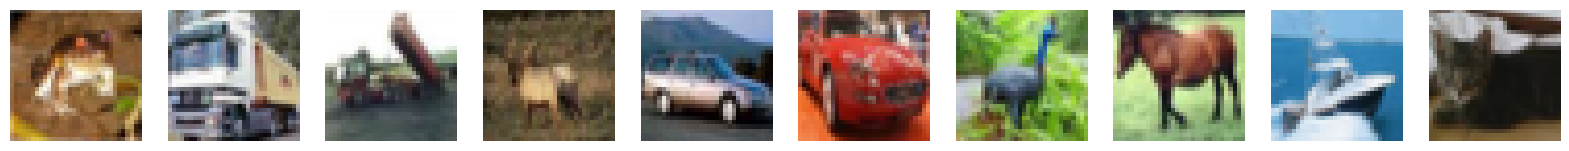

In [17]:
# İlk 10 görüntüyü görselleştirelim
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(X_train[i])
    axes[i].axis('off')
plt.show()


In [18]:
# Verileri normalize edelim
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Verileri düzleştirelim
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


In [19]:
# Eğitim ve test verilerinin alt örneklemesi oluşturalım çünkü model uzun sürüyor süreyi kısaltak iyi olur
sample_size = 10000  # Eğitim için kullanılacak örnek sayısı
X_train_sample = X_train_flat[:sample_size]
y_train_sample = y_train[:sample_size].ravel()

test_sample_size = 2000  # Test için kullanılacak örnek sayısı
X_test_sample = X_test_flat[:test_sample_size]
y_test_sample = y_test[:test_sample_size].ravel()


In [20]:
# Verileri standartlaştır
scaler = StandardScaler()
X_train_sample = scaler.fit_transform(X_train_sample)
X_test_sample = scaler.transform(X_test_sample)


In [21]:
# SVM modelini oluşturalım
svm_model = SVC(kernel='linear')

# Modeli eğitelim
svm_model.fit(X_train_sample, y_train_sample)


SVC(kernel='linear')

Accuracy: 0.318


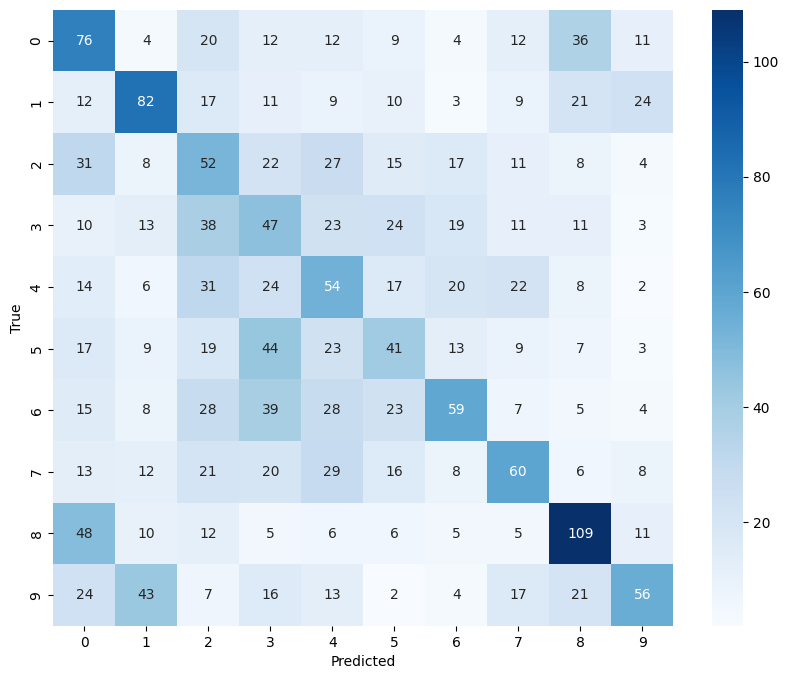

              precision    recall  f1-score   support

           0       0.29      0.39      0.33       196
           1       0.42      0.41      0.42       198
           2       0.21      0.27      0.24       195
           3       0.20      0.24      0.21       199
           4       0.24      0.27      0.26       198
           5       0.25      0.22      0.24       185
           6       0.39      0.27      0.32       216
           7       0.37      0.31      0.34       193
           8       0.47      0.50      0.49       217
           9       0.44      0.28      0.34       203

    accuracy                           0.32      2000
   macro avg       0.33      0.32      0.32      2000
weighted avg       0.33      0.32      0.32      2000



In [22]:
# Tahmin yapalım
y_pred = svm_model.predict(X_test_sample)

# Doğruluk skorunu hesaplayalım
accuracy = accuracy_score(y_test_sample, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix oluşturalım
cm = confusion_matrix(y_test_sample, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Sınıflandırma Raporu oluşturalım
print(classification_report(y_test_sample, y_pred))


SVM Modeli de başarısız oldu .

Logistic Regresyon Kullanalım

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar10
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# CIFAR-10 veri setini yükleyelim
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Veri seti boyutlarını yazdıralım
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


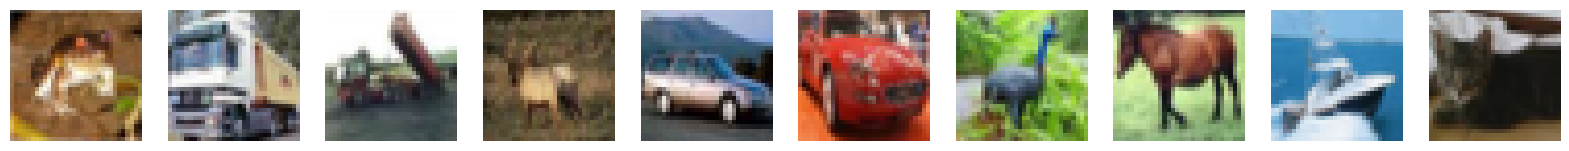

In [24]:
# İlk 10 görüntüyü görselleştirelim
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(X_train[i])
    axes[i].axis('off')
plt.show()


In [25]:
# Verileri normalize edelim
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Verileri düzleştirelim
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


In [26]:
# Eğitim ve test verilerinin alt örneklemesi yapalım
sample_size = 10000  # Eğitim için kullanılacak örnek sayısı
X_train_sample = X_train_flat[:sample_size]
y_train_sample = y_train[:sample_size].ravel()

test_sample_size = 2000  # Test için kullanılacak örnek sayısı
X_test_sample = X_test_flat[:test_sample_size]
y_test_sample = y_test[:test_sample_size].ravel()


In [27]:
# Verileri standartlaştıralım
scaler = StandardScaler()
X_train_sample = scaler.fit_transform(X_train_sample)
X_test_sample = scaler.transform(X_test_sample)


In [28]:
# Lojistik regresyon modelini oluşturalım
log_reg = LogisticRegression(max_iter=100, multi_class='ovr', solver='lbfgs', n_jobs=-1)

# Modeli eğitelim
log_reg.fit(X_train_sample, y_train_sample)


/Users/yucelgmus/Desktop/akbank_yapay_zeka/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/yucelgmus/Desktop/akbank_yapay_zeka/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yucelgmus/Desktop/akbank_yapay_zeka/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: Co

LogisticRegression(multi_class='ovr', n_jobs=-1)

Accuracy: 0.2985


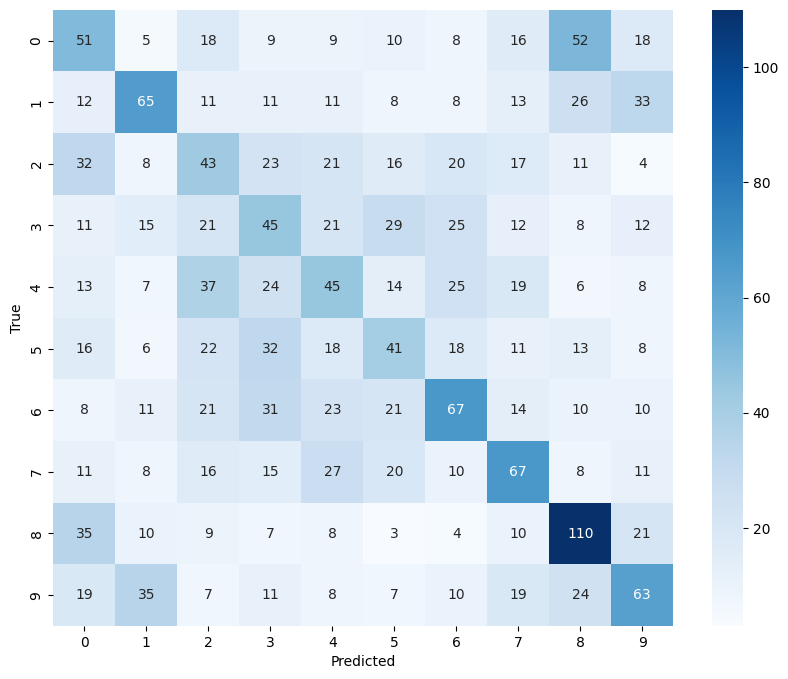

              precision    recall  f1-score   support

           0       0.25      0.26      0.25       196
           1       0.38      0.33      0.35       198
           2       0.21      0.22      0.21       195
           3       0.22      0.23      0.22       199
           4       0.24      0.23      0.23       198
           5       0.24      0.22      0.23       185
           6       0.34      0.31      0.33       216
           7       0.34      0.35      0.34       193
           8       0.41      0.51      0.45       217
           9       0.34      0.31      0.32       203

    accuracy                           0.30      2000
   macro avg       0.30      0.30      0.29      2000
weighted avg       0.30      0.30      0.30      2000



In [29]:
# Tahmin yaptıralım
y_pred = log_reg.predict(X_test_sample)

# Doğruluk skorunu hesaplattıralım
accuracy = accuracy_score(y_test_sample, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix oluşturalım
cm = confusion_matrix(y_test_sample, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Sınıflandırma Raporu oluşturalım
print(classification_report(y_test_sample, y_pred))


Logistic Regresyon modeli de başarısız oldu

Decision Tree Kullanalım


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar10
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# CIFAR-10 veri setini yükleyelim
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Veri seti boyutlarını yazdıralım
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


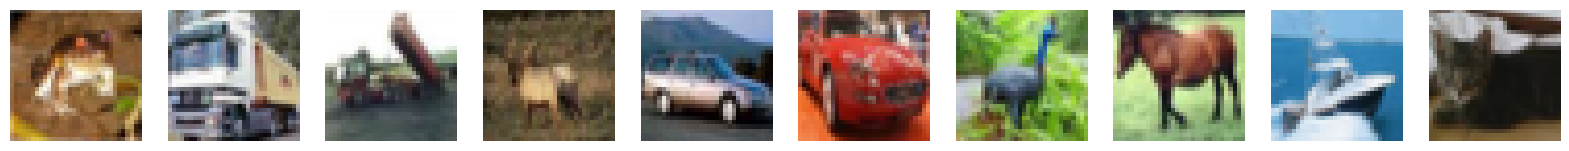

In [31]:
# İlk 10 görüntüyü görselleştirelim
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(X_train[i])
    axes[i].axis('off')
plt.show()


In [32]:
# Verileri normalize ettirelim
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Verileri düzleştirelim
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


In [33]:
# Eğitim ve test verilerinin alt örneklemesi oluşturalım
sample_size = 10000  # Eğitim için kullanılacak örnek sayısı
X_train_sample = X_train_flat[:sample_size]
y_train_sample = y_train[:sample_size].ravel()

test_sample_size = 2000  # Test için kullanılacak örnek sayısı
X_test_sample = X_test_flat[:test_sample_size]
y_test_sample = y_test[:test_sample_size].ravel()


In [34]:
# Karar ağacı modelini oluşturalım
dt_model = DecisionTreeClassifier()

# Modeli eğitelim
dt_model.fit(X_train_sample, y_train_sample)


DecisionTreeClassifier()

Accuracy: 0.2435


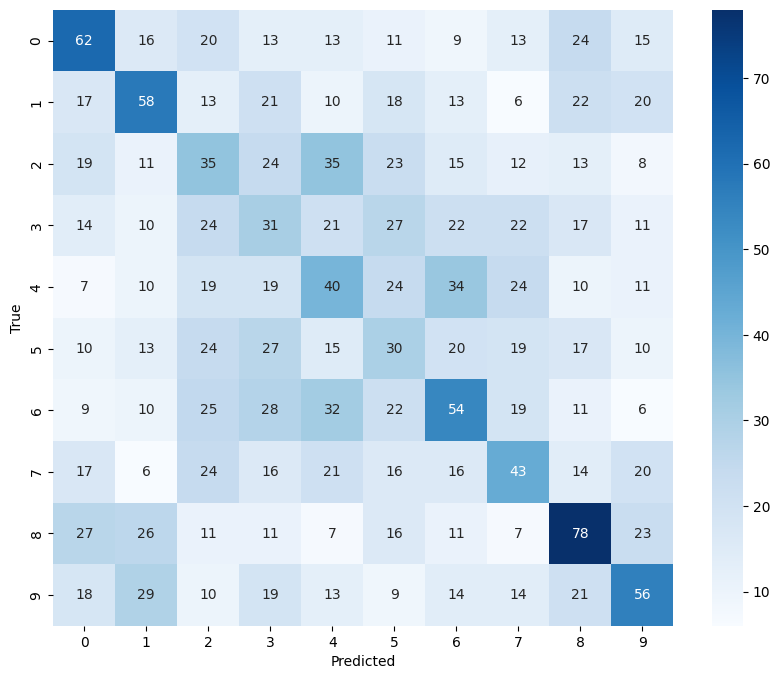

              precision    recall  f1-score   support

           0       0.31      0.32      0.31       196
           1       0.31      0.29      0.30       198
           2       0.17      0.18      0.17       195
           3       0.15      0.16      0.15       199
           4       0.19      0.20      0.20       198
           5       0.15      0.16      0.16       185
           6       0.26      0.25      0.25       216
           7       0.24      0.22      0.23       193
           8       0.34      0.36      0.35       217
           9       0.31      0.28      0.29       203

    accuracy                           0.24      2000
   macro avg       0.24      0.24      0.24      2000
weighted avg       0.25      0.24      0.24      2000



In [35]:
# Tahmin yaptıralım
y_pred = dt_model.predict(X_test_sample)

# Doğruluk skorunu hesaplattıralım
accuracy = accuracy_score(y_test_sample, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix oluşturalım
cm = confusion_matrix(y_test_sample, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Sınıflandırma Raporu oluşturalım
print(classification_report(y_test_sample, y_pred))


Decision Tree modeli  de başarısız oldu

Random Forest Kullanalım


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar10
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# CIFAR-10 veri setini yükleyelim
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Veri seti boyutlarını yazdıralım
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


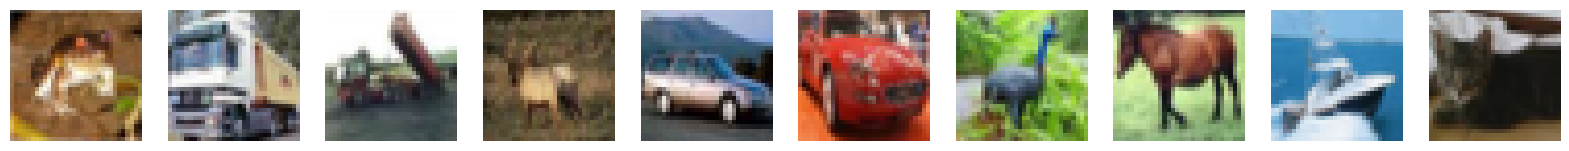

In [37]:
# İlk 10 görüntüyü görselleştirelim
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(X_train[i])
    axes[i].axis('off')
plt.show()


In [38]:
# Verileri normalize edelim
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Verileri düzleştirelim
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


In [39]:
# Eğitim ve test verilerinin alt örneklemesi
sample_size = 10000  # Eğitim için kullanılacak örnek sayısı
X_train_sample = X_train_flat[:sample_size]
y_train_sample = y_train[:sample_size].ravel()

test_sample_size = 2000  # Test için kullanılacak örnek sayısı
X_test_sample = X_test_flat[:test_sample_size]
y_test_sample = y_test[:test_sample_size].ravel()


In [40]:
# Random Forest modelini oluşturduk
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğittik
rf_model.fit(X_train_sample, y_train_sample)


RandomForestClassifier(random_state=42)

Accuracy: 0.423


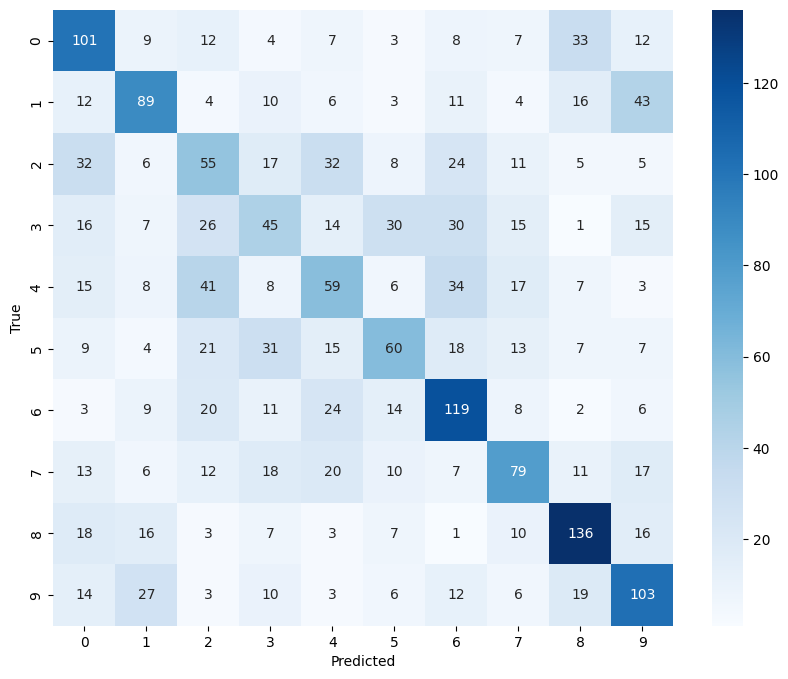

              precision    recall  f1-score   support

           0       0.43      0.52      0.47       196
           1       0.49      0.45      0.47       198
           2       0.28      0.28      0.28       195
           3       0.28      0.23      0.25       199
           4       0.32      0.30      0.31       198
           5       0.41      0.32      0.36       185
           6       0.45      0.55      0.50       216
           7       0.46      0.41      0.44       193
           8       0.57      0.63      0.60       217
           9       0.45      0.51      0.48       203

    accuracy                           0.42      2000
   macro avg       0.42      0.42      0.42      2000
weighted avg       0.42      0.42      0.42      2000



In [41]:
# Tahmin yaptırdk
y_pred = rf_model.predict(X_test_sample)

# Doğruluk skorunu hesaplatırdık
accuracy = accuracy_score(y_test_sample, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix yapalım
cm = confusion_matrix(y_test_sample, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Sınıflandırma Raporunu görelim
print(classification_report(y_test_sample, y_pred))


Random Forest modeli de başarısız oldu

YSA Kullanalım


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


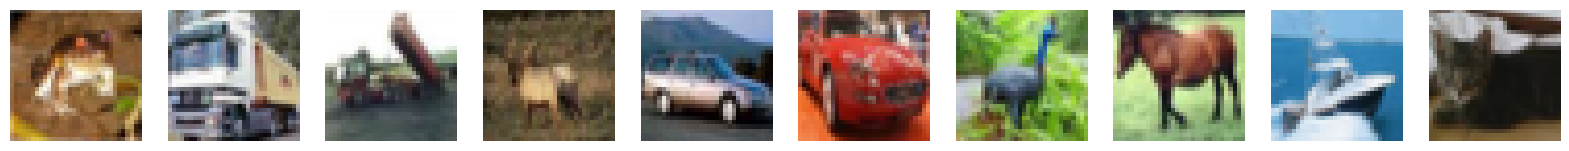

/Users/yucelgmus/Desktop/akbank_yapay_zeka/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.3401 - loss: 1.9100 - val_accuracy: 0.4518 - val_loss: 1.5584
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.4613 - loss: 1.5214 - val_accuracy: 0.4716 - val_loss: 1.5009
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5005 - loss: 1.4112 - val_accuracy: 0.5106 - val_loss: 1.3919
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.5347 - loss: 1.3061 - val_accuracy: 0.5036 - val_loss: 1.4252
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.5651 - loss: 1.2257 - val_accuracy: 0.5218 - val_loss: 1.3632
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.5916 - loss: 1.1549 - val_accuracy: 0.5390 - val_loss: 1.3395
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.6204 - loss: 1.0701 - val_accuracy: 0.5470 - val_loss: 1.3391
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.6493 - loss: 0.9797 - 

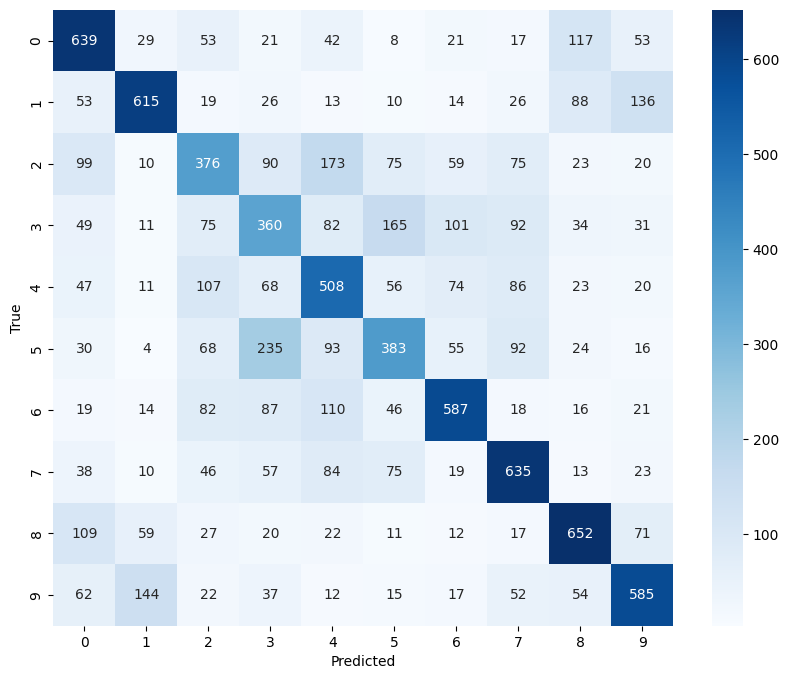

              precision    recall  f1-score   support

           0       0.56      0.64      0.60      1000
           1       0.68      0.61      0.64      1000
           2       0.43      0.38      0.40      1000
           3       0.36      0.36      0.36      1000
           4       0.45      0.51      0.47      1000
           5       0.45      0.38      0.42      1000
           6       0.61      0.59      0.60      1000
           7       0.57      0.64      0.60      1000
           8       0.62      0.65      0.64      1000
           9       0.60      0.58      0.59      1000

    accuracy                           0.53     10000
   macro avg       0.53      0.53      0.53     10000
weighted avg       0.53      0.53      0.53     10000



In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from keras.layers import BatchNormalization

# CIFAR-10 veri setini yükleyelim
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Veri seti boyutlarını yazdıralı
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# İlk 10 görüntüyü görselleştirelim
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(X_train[i])
    axes[i].axis('off')
plt.show()

# Verileri normalize edelim
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Yapay Sinir Ağı modelini oluşturalım
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten layer here handles the original image shape
     BatchNormalization(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'), #buraya kadar accuracy değeri 0.51 idi 
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Modeli derleyelim
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#  Standardization is typically applied before flattening when working with image data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test = scaler.transform(X_test.reshape(X_test.shape[0], -1))

# Reshape the data back to the original image shape after standardization
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

# Modeli eğit
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1)

# Test verileri üzerinde doğruluk değerini hesapla
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=-1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Sınıflandırma Raporu
print(classification_report(y_test, y_pred))

burda epoch sayısını 10 dan 20 ye çıkardık nöron sayısını artırdık ve batch_size ı 64 e çıkardık ve sonuc accuracy değeri 0.51 den 0.87 ye çıktı ama overfitting oluştu Early Stopping kullanmadık o yüzden sonuç bize 0.53 olarak döndü
